In [56]:
import fitsio
%load_ext autoreload
%autoreload 2
import lusee
import healpy as hp
import matplotlib
font = {'size'   : 16}
matplotlib.rc('font', **font)
import os


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
sky = lusee.sky.FitsSky(os.environ['LUSEE_DRIVE_DIR']+"/Simulations/SkyModels/ULSA_32_ddi_smooth.fits",lmax=1)
skymeans = sky.maps.mean(axis=1)
freq = sky.freq

In [58]:
import astropy.units as u
T_NB= lusee.monosky.T_NB(freq)
T_C= lusee.monosky.T_C(freq)
TskyApprox = lusee.monosky.T_J

[]

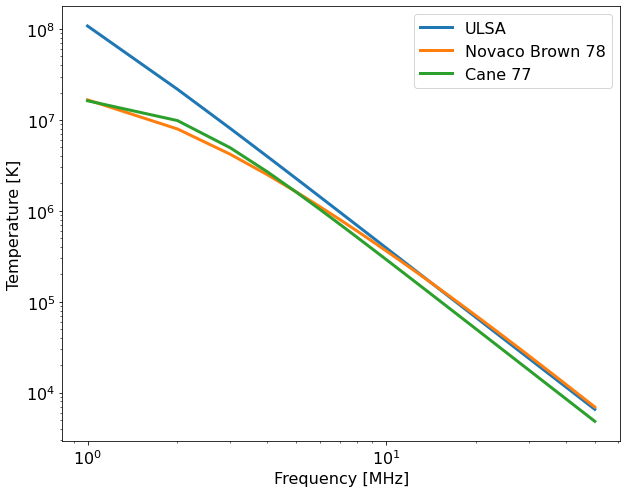

In [59]:
plt.figure(figsize=(10,8))
plt.plot(freq,skymeans,label='ULSA',lw=3)
plt.plot(freq,T_NB,label="Novaco Brown 78",lw=3)
plt.plot(freq,T_C,label="Cane 77",lw=3)
plt.plot()
plt.xlabel('Frequency [MHz]')
plt.ylabel('Temperature [K]')
plt.legend()
plt.loglog()

In [60]:
data_lbl = lusee.LData('../simulation/output/hfss_lbl_1m_0523.fits')
data_bnl = lusee.LData('../simulation/output/feko_bnl_1m_0523.fits')
data_lbl2 = lusee.LData('../simulation/output/hfss_lbl_1m_0523.2port.fits')
data_bnl2 = lusee.LData('../simulation/output/feko_bnl_1m_0523.2port.fits')

data_lbl[:,'13I',:]==data_lbl[:,'02I',:]
data_bnl.data.shape
data_lbl[:,'02I',:]

array([[2432.34735902, 2450.43612536, 1800.86101407, ..., -146.5741667 ,
        -111.3480521 ,  -96.75654815],
       [1419.97392876, 1905.18533172, 1381.18001731, ..., -134.21038819,
        -106.48787136,  -94.12459056],
       [ 751.1563677 , 1326.0744929 , 1084.50302391, ...,  -92.71134383,
         -75.8402706 ,  -66.94640667],
       ...,
       [3541.98925689, 3567.60032265, 2776.19581704, ...,  -54.98597689,
         -46.50939793,  -38.97089654],
       [3009.89634745, 3246.19864246, 2433.26962239, ...,  -87.21532797,
         -66.08319194,  -54.56385743],
       [2658.32446457, 2593.24533868, 1933.86571668, ..., -137.77691118,
        -103.29379342,  -88.68021228]])

Text(0, 0.5, '$V_{ij}\\ [K]$')

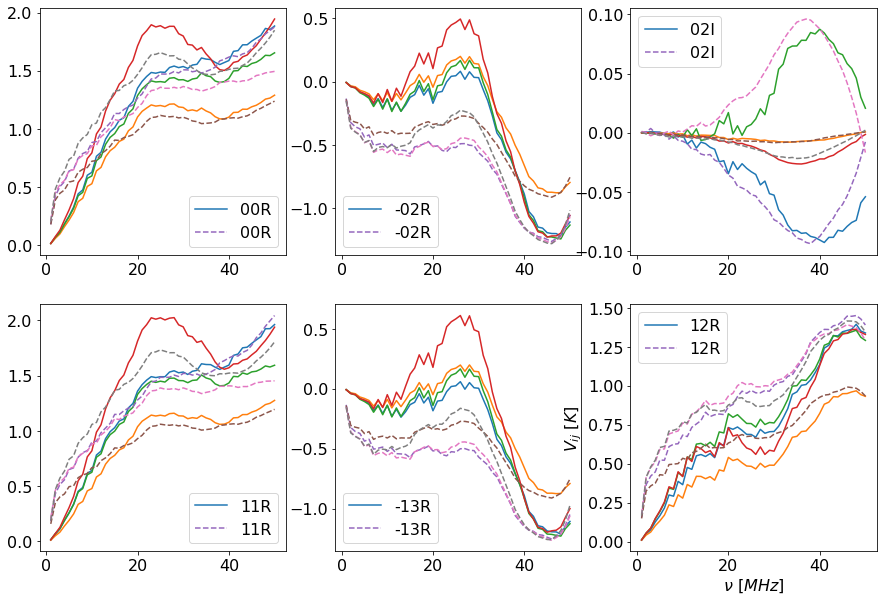

In [61]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(2 ,3,figsize=(15,10))
we = (freq/10)**2.5/1e5
axl = [ax1,ax2,ax3,ax4,ax5,ax6]

for ii,comb in enumerate(['00R','-02R','02I','11R','-13R','12R']):
    for daydata,clr in [(data_lbl,'-'), (data_bnl,'--')]:
        xa = lambda x: x
        for day in np.arange(0,28,7):
            axl[ii].plot(freq,daydata[day,comb,:]*we,  clr,label = xa(comb))
            xa = lambda x: None
[ax.legend() for ax in axl]
plt.xlabel('$\\nu\ [MHz]$')
plt.ylabel('$V_{ij}\ [K]$')
#plt.semilogy()

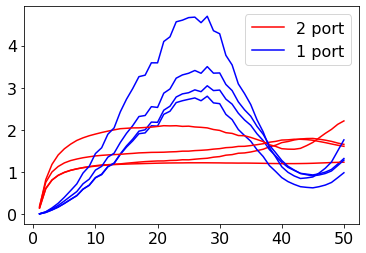

In [62]:
data1=data_lbl
data2=data_lbl2
for day in np.arange(0,28,7):
    NN = data1[day,'00R',:]
    SS = data1[day,'22R',:]
    NS = data1[day,'02R',:]
    plt.plot(freq,data2[day,'00R',:]*we,'r-')
    plt.plot(freq,((NN+SS-2*NS))*we,'b-')
    #plt.plot(freq,data2[day,'00R',:]/(NN+SS-2*NS) )
plt.plot([],[],'r-',label='2 port')
plt.plot([],[],'b-',label='1 port')
plt.legend()
    

In [63]:
data_lbl = lusee.LData('../simulation/output/hfss_lbl_1m_0523.fits')
data_lbl3 = lusee.LData('../simulation/output/hfss_lbl_3m_0523.fits')
data_lbl6 = lusee.LData('../simulation/output/hfss_lbl_6m_0523.fits')

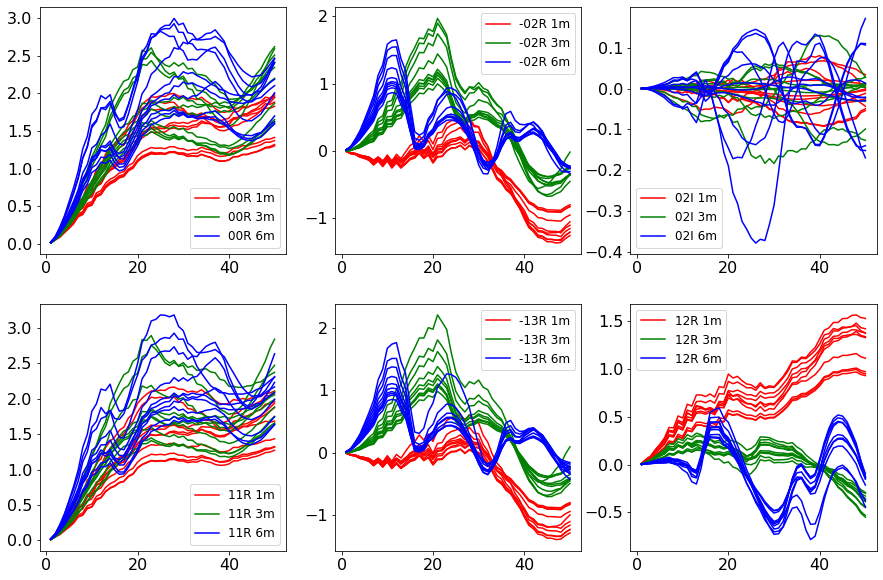

In [90]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(2 ,3,figsize=(15,10))
we = (freq/10)**2.5/1e5
axl = [ax1,ax2,ax3,ax4,ax5,ax6]

for ii,comb in enumerate(['00R','-02R','02I','11R','-13R','12R']):
    for daydata,clr,lbl in [(data_lbl,'r-','1m'), (data_lbl3,'g-','3m'), (data_lbl6,'b-','6m')]:
        xa = lambda x: x
        for day in np.arange(0,28,3):
            axl[ii].plot(freq,daydata[day,comb,:]*we,  clr,label = xa(comb + " " +lbl))
            xa = lambda x: None
[ax.legend(fontsize=12) for ax in axl]


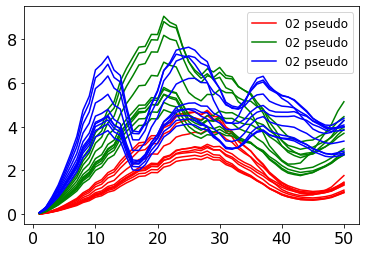

In [93]:
fig,ax=plt.subplots()
for daydata,clr,lbl in [(data_lbl,'r-','1m'), (data_lbl3,'g-','3m'), (data_lbl6,'b-','6m')]:
        xa = lambda x: x
        for day in np.arange(0,28,3):
            toplot = daydata[day,'00R',:]+daydata[day,'22R',:]-2*daydata[day,'02R',:]
            ax.plot(freq,toplot*we,  clr,label = xa("02 pseudo"))
            xa = lambda x: None
ax.legend(fontsize=12)



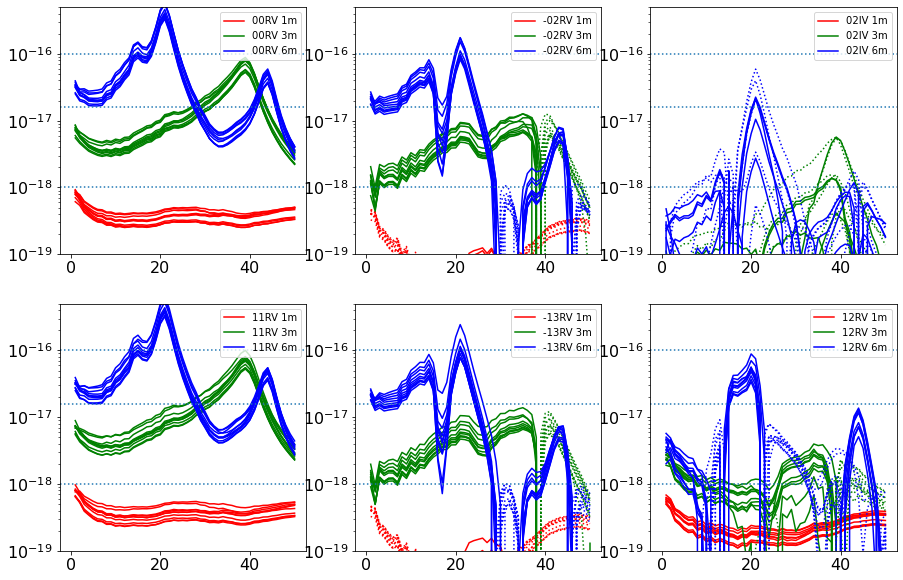

In [66]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(2 ,3,figsize=(15,10))
we=1
axl = [ax1,ax2,ax3,ax4,ax5,ax6]

for ii,comb in enumerate(['00RV','-02RV','02IV','11RV','-13RV','12RV']):
    for daydata,clr,lbl in [(data_lbl,'r','1m'), (data_lbl3,'g','3m'), (data_lbl6,'b','6m')]:
        xa = lambda x: x
        for day in np.arange(0,28,3):
            axl[ii].plot(freq,daydata[day,comb,:]*we,  clr,label = xa(comb + " " +lbl))
            axl[ii].plot(freq,-daydata[day,comb,:]*we,  clr+':')
            xa = lambda x: None
    
[ax.legend(fontsize=10) for ax in axl]
[ax.semilogy() for ax in axl]
[ax.axline([0,(1e-9**2)],[1,(1e-9**2)],ls=':') for ax in axl]
[ax.axline([0,(4e-9**2)],[1,(4e-9**2)],ls=':') for ax in axl]
[ax.axline([0,(10e-9**2)],[1,(10e-9**2)],ls=':') for ax in axl]
[ax.set_ylim(1e-19,5e-16) for ax in axl]
pass

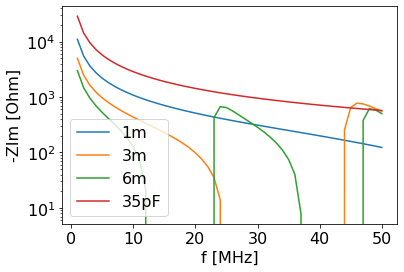

In [83]:
freq= data_lbl.freq

plt.plot(data_lbl.freq,-data_lbl.ZIm[0],label='1m')
plt.plot(data_lbl.freq,-data_lbl3.ZIm[0],label='3m')
plt.plot(data_lbl.freq,-data_lbl6.ZIm[0],label='6m')
plt.plot(data_lbl.freq,1/(35e-12*freq*1e6),label='35pF')
plt.semilogy()
plt.xlabel('f [MHz]')
plt.ylabel('-ZIm [Ohm]')
plt.legend()

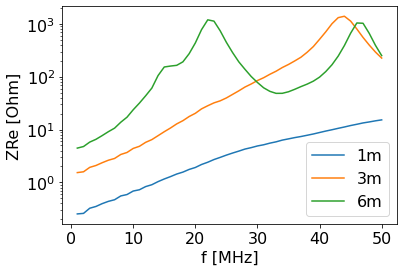

In [84]:
plt.plot(data_lbl.freq,data_lbl.ZRe[0],label='1m')
plt.plot(data_lbl.freq,data_lbl3.ZRe[0],label='3m')
plt.plot(data_lbl.freq,data_lbl6.ZRe[0],label='6m')
plt.semilogy()
plt.xlabel('f [MHz]')
plt.ylabel('ZRe [Ohm]')
plt.legend()

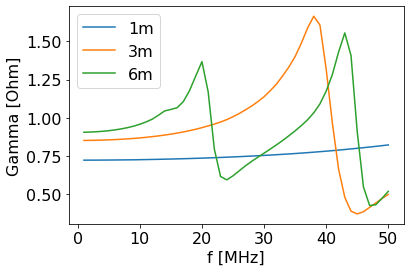

In [85]:
plt.plot(data_lbl.freq,data_lbl.Gamma[0],label='1m')
plt.plot(data_lbl.freq,data_lbl3.Gamma[0],label='3m')
plt.plot(data_lbl.freq,data_lbl6.Gamma[0],label='6m')
plt.xlabel('f [MHz]')
plt.ylabel('Gamma')
plt.legend()

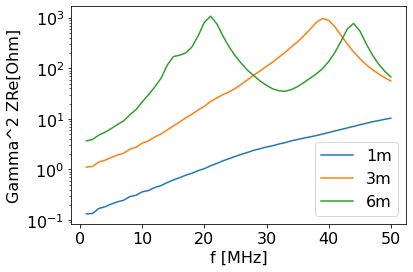

In [97]:
plt.plot(data_lbl.freq,data_lbl.Gamma[0]**2*data_lbl.ZRe[0],label='1m')
plt.plot(data_lbl.freq,data_lbl3.Gamma[0]**2*data_lbl3.ZRe[0],label='3m')
plt.plot(data_lbl.freq,data_lbl6.Gamma[0]**2*data_lbl6.ZRe[0],label='6m')
plt.xlabel('f [MHz]')
plt.ylabel('Gamma^2 ZRe[Ohm]')
plt.semilogy()
plt.legend()